In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from xgboost import XGBClassifier

In [2]:
# Importando dataset

dataset = pd.read_csv('.\data\parkinsons.data')

In [3]:
# 5 primeiras linhas do dataset

dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Informacoes dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [15]:
# separando o dataframe em x e y

x_df = dataset.drop(dataset[['status','name']], axis=1)
y_df = dataset['status']

([<matplotlib.axis.XTick at 0x1cc304a2648>,
 <a list of 2 Text xticklabel objects>)

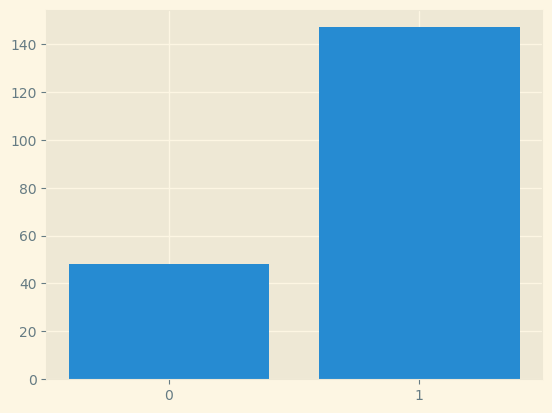

In [16]:
plt.rcdefaults() 
plt.style.use('Solarize_Light2')
plt.bar(y_df.value_counts().index, y_df.value_counts().values)
plt.xticks([0,1])

In [18]:
# Normalização do dados

scaler = MinMaxScaler()

scaler.fit(x_df)

x_df2 = scaler.transform(x_df)

In [20]:
# Separação dos dados em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x_df2, y_df, test_size=.2, random_state=7)

In [30]:
# Criando algoritmo de RandomForest

clrf = RandomForestClassifier()

clrf.fit(x_train, y_train)

previsao_clrf = clrf.predict(x_test)

print('Matrix deconfusão')
print(confusion_matrix(y_test, previsao_clrf))
print('-'*50)
print('Acúracia')
print(accuracy_score(y_test, previsao_clrf))

Matrix deconfusão
[[ 4  3]
 [ 0 32]]
--------------------------------------------------
Acúracia
0.9230769230769231


In [36]:
# Criando algoritmo de XGBclassifier

clxgboost = XGBClassifier()

clxgboost.fit(x_train, y_train)

previsao_xg = clxgboost.predict(x_test)

print('Matrix deconfusão')
print(confusion_matrix(y_test, previsao_xg))
print('-'*50)
print('Acúracia')
print(accuracy_score(y_test, previsao_xg))

Matrix deconfusão
[[ 6  1]
 [ 1 31]]
--------------------------------------------------
Acúracia
0.9487179487179487


## Feature Selection

In [56]:
# Criando algoritmo de RandomForest e buscando a melhor quantidade de variavel para ser utilizado

for k in range(2,23,1):
    best = SelectKBest(score_func=f_classif, k=k)
    x_train3 = best.fit_transform(x_train,y_train)
    x_test3 = best.transform(x_test)

    clrf = RandomForestClassifier()

    clrf.fit(x_train3, y_train)

    previsao_clrf2 = clrf.predict(x_test3)
    
    print('valor de k: {k}'.format(k=k))
    print('Matrix de confusão')
    print(confusion_matrix(y_test, previsao_clrf2))
    print(' '*50)
    print('Acúracia')
    print(accuracy_score(y_test, previsao_clrf2))
    print('-'*50)

valor de k: 2
Matrix de confusão
[[ 4  3]
 [ 1 31]]
                                                  
Acúracia
0.8974358974358975
--------------------------------------------------
valor de k: 3
Matrix de confusão
[[ 3  4]
 [ 2 30]]
                                                  
Acúracia
0.8461538461538461
--------------------------------------------------
valor de k: 4
Matrix de confusão
[[ 5  2]
 [ 1 31]]
                                                  
Acúracia
0.9230769230769231
--------------------------------------------------
valor de k: 5
Matrix de confusão
[[ 5  2]
 [ 1 31]]
                                                  
Acúracia
0.9230769230769231
--------------------------------------------------
valor de k: 6
Matrix de confusão
[[ 4  3]
 [ 1 31]]
                                                  
Acúracia
0.8974358974358975
--------------------------------------------------
valor de k: 7
Matrix de confusão
[[ 4  3]
 [ 1 31]]
                                      

In [76]:
# Criando algoritmo de XGBclassifier e buscando a melhor quantidade de variavel para ser utilizado


for k in range(2,23,1):
    best2 = SelectKBest(score_func=f_classif, k=k)
    x_train3 = best2.fit_transform(x_train,y_train)
    x_test3 = best2.transform(x_test)

    clxgboost = XGBClassifier()

    clxgboost.fit(x_train3, y_train)

    previsao_xg3 = clxgboost.predict(x_test3)
    
    print('valor de k: {k}'.format(k=k))
    print('Matrix de confusão')
    print(confusion_matrix(y_test, previsao_xg3))
    print(' '*50)
    print('Acúracia')
    print(accuracy_score(y_test, previsao_xg3))
    print('-'*50)

valor de k: 2
Matrix de confusão
[[ 4  3]
 [ 2 30]]
                                                  
Acúracia
0.8717948717948718
--------------------------------------------------
valor de k: 3
Matrix de confusão
[[ 5  2]
 [ 2 30]]
                                                  
Acúracia
0.8974358974358975
--------------------------------------------------
valor de k: 4
Matrix de confusão
[[ 5  2]
 [ 2 30]]
                                                  
Acúracia
0.8974358974358975
--------------------------------------------------
valor de k: 5
Matrix de confusão
[[ 4  3]
 [ 2 30]]
                                                  
Acúracia
0.8717948717948718
--------------------------------------------------
valor de k: 6
Matrix de confusão
[[ 4  3]
 [ 1 31]]
                                                  
Acúracia
0.8974358974358975
--------------------------------------------------
valor de k: 7
Matrix de confusão
[[ 4  3]
 [ 1 31]]
                                      

In [60]:
# melhor valor de k=21

best2 = SelectKBest(score_func=f_classif, k=21)
x_train3 = best2.fit_transform(x_train,y_train)
x_test3 = best2.transform(x_test)
clxgboost = XGBClassifier()

clxgboost.fit(x_train3, y_train)

previsao_xg3 = clxgboost.predict(x_test3)
    
print('valor de k: {k}'.format(k=k))
print('Matrix de confusão')
print(confusion_matrix(y_test, previsao_xg3))
print(' '*50)
print('Acúracia')
print(accuracy_score(y_test, previsao_xg3))
print('-'*50)

valor de k: 22
Matrix de confusão
[[ 6  1]
 [ 0 32]]
                                                  
Acúracia
0.9743589743589743
--------------------------------------------------


In [75]:
# Varivael que foi retirada para se obter o melhor resultado

mask = best2.get_support()
x_df.columns[~mask]

Index(['NHR'], dtype='object')